# Assignment 2

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/). If you're not already a peergrade user, [you can use this link to sign up]( 
https://app.peergrade.io/join/44E47G) - **PLEASE USE YOUR DTU EMAIL WHEN YOU SIGN UP**.

**Peergrading date and time**: \[OPTIONAL FOR ASSIGNMENT 2\] _Remember that after handing in you MAY evaluate a few assignments written by other members of the class_. (Should you choose to do this, the deadline is Tuesday April 11 at noon). 

## A2: A short data story

This assignment is to create a short data-story based on the work we've done in class so far. See **Exercises Week 8, Part 2** for full details on how the story should be constructed.

In [1]:
# Imports
import pandas as pd

In [2]:
# Upload data
data=pd.read_csv("C:/Users/zuzal/Masters/02806 Social Data Analysis/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

# Create column 'Year'
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Delete rows of year 2018
data = data[data['Year'] <2018]

# Create column 'HourOfDay'
data['HourOfDay'] = [(i[:2]) for i in data['Time']]

### Let's compare PROSTITUTION with DRUG/NARCOTIC

In [3]:
# Use the pivot_table() method to count incidents in each category and subcategory
year_cat = data.pivot_table(index='Year', columns='Category', aggfunc='size', fill_value=0)
hour_cat = data.pivot_table(index='HourOfDay', columns='Category', aggfunc='size', fill_value=0)
week_cat = data.pivot_table(index='DayOfWeek', columns='Category', aggfunc='size', fill_value=0)

# Select only DRUG/NARCOTIC and PROSTITUTION
year_cat = year_cat.drop(list(year_cat.columns[:7]) + list(year_cat.columns[8:22]) +list(year_cat.columns[23:]), axis=1)
hour_cat = hour_cat.drop(list(hour_cat.columns[:7]) + list(hour_cat.columns[8:22]) +list(hour_cat.columns[23:]), axis=1)
week_cat = week_cat.drop(list(week_cat.columns[:7]) + list(week_cat.columns[8:22]) +list(week_cat.columns[23:]), axis=1)

# Normalise to compare
normalized_year_cat = year_cat/year_cat.sum(axis=0)
normalized_hour_cat = hour_cat/hour_cat.sum(axis=0)
normalized_week_cat = week_cat/week_cat.sum(axis=0)
normalized_week_cat = normalized_week_cat.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create the 'year' column (instead of having it only as the index of the dataframe)
normalized_year_cat['year'] = [str(i) for i in normalized_year_cat.index]
normalized_hour_cat['Hour'] = list(normalized_hour_cat.index)
normalized_week_cat['Day'] = list(normalized_week_cat.index)

In [4]:

normalized_week_cat

Category,DRUG/NARCOTIC,PROSTITUTION,Day
DayOfWeek,,,
Monday,0.141364,0.068255,Monday
Tuesday,0.159636,0.182520,Tuesday
Wednesday,0.172786,0.200024,Wednesday
Thursday,0.155150,0.220628,Thursday
Friday,0.137591,0.168723,Friday
Saturday,0.119895,0.095484,Saturday
Sunday,0.113578,0.064365,Sunday


In [5]:
### Bokeh

# If we want to show it in the notebook
from bokeh.io import output_notebook # , vplot
#output_notebook()

# Imports for the plots
from bokeh.palettes import Spectral3
from bokeh.transform import factor_cmap

from bokeh.plotting import figure, output_file, show
#output_file("assignment2-bokeh.html")

Figure 1 (Year)

In [6]:
# it is a standard way to convert your df to bokeh
from bokeh.models import ColumnDataSource, FactorRange
source = ColumnDataSource(normalized_year_cat) 

### Add the figure p1

p1 = figure(x_range = FactorRange(factors=list(normalized_year_cat.year)), x_axis_label='Year', y_axis_label='Frequency', 
           title='Frequency of Crimes per Year',  height=450) 


### Add the bars
bar ={} # to store vbars
focuscrimes = set(['PROSTITUTION', 'DRUG/NARCOTIC'])
colors = ['#1f77b4', '#ff7f0e']

### here we will do a for loop (we will create a vbar for each focuscrime):
for indx, i in enumerate(focuscrimes):
    bar[i] = p1.vbar(x='year', source=source, top=i, legend_label=i, 
                    width = 0.85,
                    fill_color=colors[indx],
                    line_color="black",
                    line_width=2,
                    alpha=0.75,
                    muted_alpha=0.03)


### Maybe, change the legend position


### Show and display
p1.legend.click_policy="mute" ### assigns the click policy (you can try to use 'hide', in that case is like having muted_alpha=0)
tmp_output_filename = 'p1.html'



Figure 2 (Week)

In [7]:
# it is a standard way to convert your df to bokeh
source = ColumnDataSource(normalized_week_cat) 

### Add the figure p1

p2 = figure(x_range = FactorRange(factors=list(normalized_week_cat.index)), x_axis_label='Day', y_axis_label='Frequency', 
           title='Frequency of Crimes per Day of Week', height=450) 


### Add the bars
bar ={} # to store vbars
focuscrimes = set(['PROSTITUTION', 'DRUG/NARCOTIC'])
colors = ['#1f77b4', '#ff7f0e']

### here we will do a for loop (we will create a vbar for each focuscrime):
for indx, i in enumerate(focuscrimes):
    bar[i] = p2.vbar(x='Day', source=source, top=i, legend_label=i, 
                    width = 0.85,
                    fill_color=colors[indx],
                    line_color="black",
                    line_width=2,
                    alpha=0.75,
                    muted_alpha=0.03)


### Maybe, change the legend position


### Show and display
p2.legend.click_policy="mute" ### assigns the click policy (you can try to use 'hide', in that case is like having muted_alpha=0)
tmp_output_filename = 'p2.html'


Figure 3 (Hour)

In [8]:
source = ColumnDataSource(normalized_hour_cat)

### Add the figure

p3 = figure(x_range = FactorRange(factors=list(normalized_hour_cat.index)), x_axis_label='Hour', y_axis_label='Frequency', 
           title='Crimes per hour', height=450) 


### Add the bars
bar ={} # to store vbars
focuscrimes = set(['PROSTITUTION', 'DRUG/NARCOTIC'])
colors = ['#1f77b4', '#ff7f0e']

### here we will do a for loop (we will create a vbar for each focuscrime):
for indx, i in enumerate(focuscrimes):
    bar[i] = p3.vbar(x='Hour', source=source, top=i, legend_label=i, 
                    width = 0.85,
                    #fill_color=factor_cmap('Hour', palette=Spectral3, factors=list(focuscrimes), start=0, end=13),
                    fill_color=colors[indx],
                    line_color="black",
                    line_width=2,
                    alpha=0.75,
                    muted_alpha=0.03)  #  muted = ....) 



### Maybe, change the legend position


### Show and display
p3.legend.click_policy="mute" ### assigns the click policy (you can try to use 'hide', in that case is like having muted_alpha=0)
tmp_output_filename = 'p3.html'


All the figures

In [9]:
# put all the plots in a VBox
#p = vplot(p1, p3) #, p3)  # for now it does not work vplot

# show the results
#show(p)

from bokeh.models.callbacks import CustomJS
from bokeh.models.widgets import Select
from bokeh.layouts import column

p1.visible = False
p2.visible = False
p3.visible = True

# Define the options for the dropdown menu
options = ["Days", "Years", "Hours"]
# Create a Select widget
picklist = Select(title="Select time unit for x-axis", value=options[2], options=options)

callback = CustomJS(args=dict(p_day=p2, p_year=p1, p_hour=p3), code="""
    p_day.visible = false;
    p_year.visible = false;
    p_hour.visible = false;
    if (cb_obj.value == "Days") {
        p_day.visible = true;
    } else if (cb_obj.value == "Years") {
        p_year.visible = true;
    } else {
        p_hour.visible = true;
    }
""")

picklist.js_on_change('value', callback)

layout = column(picklist, p2, p1, p3)

output_file("crimes_plot_pls.html")

show(layout)

### Map plot

> I don't know why there are only 3 dots for prostitution.

In [20]:
#Plot San Francisco map 
import folium
m1 = folium.Map([37.77919, -122.41914],tiles="Stamen Toner", zoom_start=13)

focuscrimes = set(['PROSTITUTION', 'DRUG/NARCOTIC'])
colors = ['#1f77b4', '#ff7f0e']

def plotDot(point, color, year, count, radius):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=point,
                        radius=radius,
                        weight=5,
                        color=color,
                        popup=f"<i>{year}: {count} cases </i>",
                        tooltip=year).add_to(m1)


# Convert the column to float
data['X'] = data['X'].astype(float)

# Round the column to 10 decimal places
data['X'] = data['X'].round(6)

# Convert the column to float
data['Y'] = data['Y'].astype(float)

# Round the column to 10 decimal places
data['Y'] = data['Y'].round(6)

for i, crime in enumerate(focuscrimes):

    location = data[data['Category']== crime].groupby(['X', 'Y']).size()
    location = location.sort_values(ascending=False).reset_index()
    color=colors[i]

    tooltip = crime
    #print(f"The most common location for {year} was {[location['Y'][0],location['X'][0]]}, the number of crimes was {location[0][0]}. Number of different locations: {len(location)}")
    
    for idx in range(8):
        #print top 5 places
        plotDot([location['Y'][idx],location['X'][idx]], color, crime, location[0][idx], 3)
        print([location['Y'][idx],location['X'][idx]])
    
    #folium.Marker(
    #    [location['Y'][0],location['X'][0]] , popup=f"<i>{crime}</i>", tooltip=tooltip
    #).add_to(m1)



m1
m1.save("map.html")

[37.78445, -122.416075]
[37.763634, -122.41623]
[37.760433, -122.41593]
[37.787965, -122.418468]
[37.787037, -122.418274]
[37.787486, -122.418369]
[37.765249, -122.41639]
[37.758697, -122.417964]
[37.764221, -122.419658]
[37.775421, -122.403405]
[37.782793, -122.414056]
[37.783386, -122.409854]
[37.783215, -122.410769]
[37.781751, -122.411071]
[37.781862, -122.41387]
[37.76505, -122.419672]


In [16]:

location = data[data['Category']== 'PROSTITUTION'].groupby(['X', 'Y']).size()
location = location.sort_values(ascending=False).reset_index()
location.head(8)

,X,Y,0
0,-122.416075,37.784450,1179
1,-122.416230,37.763634,1013
2,-122.415930,37.760433,872
3,-122.418468,37.787965,685
4,-122.418274,37.787037,603
5,-122.418369,37.787486,551
6,-122.416390,37.765249,478
7,-122.417964,37.758697,449


Crime PROSTITUTION:
a: -99.38
b: 200840.62

Crime DRUG/NARCOTIC:
a: -504.39
b: 1021586.44



NameError: name 'np' is not defined

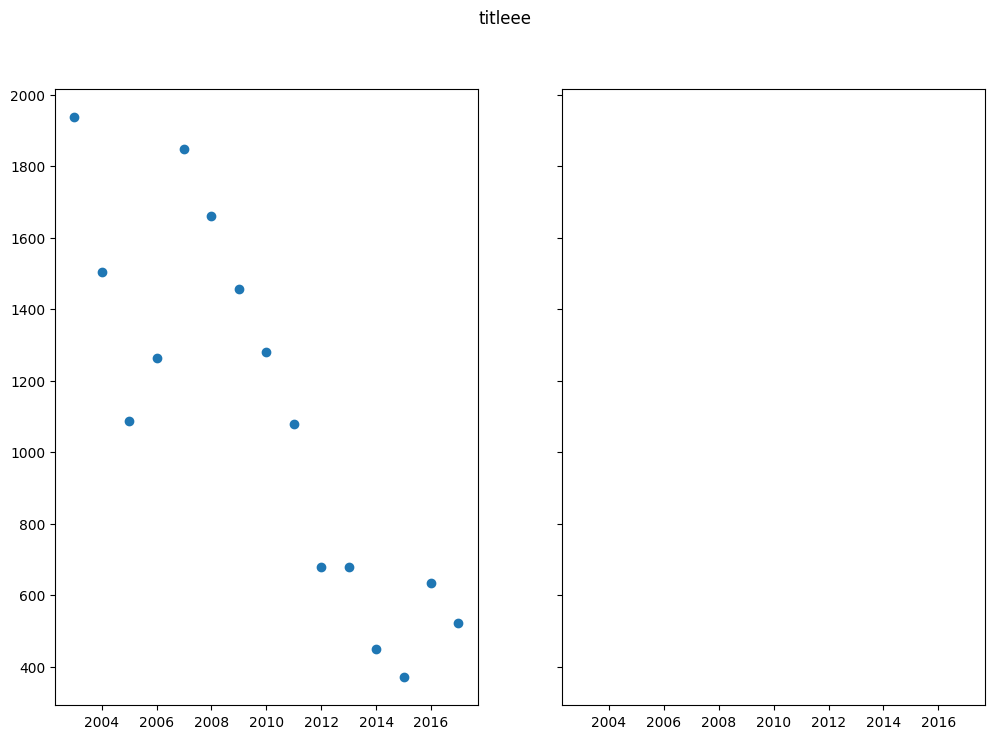

In [21]:
import numpy as np

focuscrimes = set({'PROSTITUTION', 'DRUG/NARCOTIC'})
datos = year_cat

# Linear regression to fit a stright line
from scipy import stats

slopes = []
intercepts = []
for i, crime in enumerate(focuscrimes):
    x, y = list(datos.index), datos[crime]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes.append(stats.linregress(x,y)[0])
    intercepts.append(stats.linregress(x,y)[1])
    
    print(f'Crime {crime}:\na: {slope:.2f}\nb: {intercept:.2f}\n')


# Plot the 2 crimes
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)
fig.suptitle('titleee')

axs[0].scatter(list(datos.index), datos['PROSTITUTION'])
axs[0].plot(list(datos.index), slopes[0]*np.array(datos.index) + intercepts[0], 'r')
axs[0].set_title('Prostitution')
axs[0].set_xlim(left=2002, right=2018)

axs[1].scatter(list(datos.index), datos['DRUG/NARCOTIC'])
axs[1].plot(list(datos.index), slopes[1]*np.array(datos.index) + intercepts[1], 'r')
axs[1].set_title('Drug/Narcotic')
axs[1].set_xlim(left=2002, right=2018)


# Labels
for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Nb. of incidents')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0bd28265-4ef9-4244-9130-dfeb6e6916c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [23]:
## Bokeh
import numpy as np
# plot it
fig=figure( x_axis_label='Year', y_axis_label='Nb. of incidents', 
           title='Crimes per year. Linear regression', width=1000, height=750) #x_range = FactorRange(factors=list(datos.index)),

# add scatter glyphs to the plot
fig.scatter(list(datos.index), datos['PROSTITUTION'], color='red', legend_label='Prostitution')
fig.scatter(list(datos.index), datos['DRUG/NARCOTIC'], color='blue', legend_label='Drug/Narcotic')

fig.line(list(datos.index), slopes[0]*np.array(datos.index) + intercepts[0], color='red', legend_label='Prostitution linear trend')
fig.line(list(datos.index), slopes[1]*np.array(datos.index) + intercepts[1], color='blue', legend_label='Drug/Narcotic linear trend')

# add a legend to the plot
fig.legend.location = "top_right"
fig.legend.click_policy="mute" ### assigns the click policy (you can try to use 'hide', in that case is like having muted_alpha=0)

# Show and display
show(fig)

In [24]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.models import Label

# Define focus crimes
focuscrimes = set({'PROSTITUTION', 'DRUG/NARCOTIC'})

# Load data
datos = year_cat

# Compute linear regression for each crime
slopes = []
intercepts = []
for i, crime in enumerate(focuscrimes):
    x, y = list(datos.index), datos[crime]
    slope, intercept, _, _, _ = stats.linregress(x, y)
    slopes.append(slope)
    intercepts.append(intercept)
    print(f'Crime {crime}:\na: {slope:.2f}\nb: {intercept:.2f}\n')

# Create figures
figs = []
for i, crime in enumerate(focuscrimes):
    # Create figure
    fig = figure(title=crime, x_axis_label='Years', y_axis_label='Nb. of incidents')
    
    # Add data points
    fig.scatter(list(datos.index), datos[crime])
    
    # Add linear regression line
    fig.line(list(datos.index), slopes[i]*np.array(datos.index) + intercepts[i], line_color='red')
    
    # Add equation for the line
    eq_label = Label(x=0.05, y=0.9, x_units='data', y_units='data',
                     text=f'y = {slopes[i]:.2f}x + {intercepts[i]:.2f}',
                     border_line_alpha=0, background_fill_alpha=0)
    fig.add_layout(eq_label)
    
    figs.append(fig)

# Set output file and show plot
output_file("focus_crimes.html")
show(gridplot([figs]))


Crime PROSTITUTION:
a: -99.38
b: 200840.62

Crime DRUG/NARCOTIC:
a: -504.39
b: 1021586.44



In [6]:
#BOKEH REGRESSION 
from bokeh.io import curdoc, output_file, show
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure
from scipy import stats
import numpy as np
from bokeh.models import Label, CustomJS


# Process data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data = data[data['Year'] < 2018]
data['HourOfDay'] = [(i[:2]) for i in data['Time']]

# Create pivot tables for year, hour, and day of the week
year_cat = data.pivot_table(index='Year', columns='Category', aggfunc='size', fill_value=0)
hour_cat = data.pivot_table(index='HourOfDay', columns='Category', aggfunc='size', fill_value=0)
week_cat = data.pivot_table(index='DayOfWeek', columns='Category', aggfunc='size', fill_value=0)

# Select only DRUG/NARCOTIC and PROSTITUTION categories
selected_columns = ['DRUG/NARCOTIC', 'PROSTITUTION']
year_cat = year_cat[selected_columns]

# Normalize data
normalized_year_cat = year_cat/year_cat.sum(axis=0)

# Add 'year' column
normalized_year_cat['year'] = [str(i) for i in normalized_year_cat.index]

# Define focus crimes
focuscrimes = set(selected_columns)

# Load data for linear regression
datos = year_cat

# Compute linear regression for each crime
slopes = []
intercepts = []
for i, crime in enumerate(focuscrimes):
    x, y = list(datos.index), datos[crime]
    slope, intercept, _, _, _ = stats.linregress(x, y)
    slopes.append(slope)
    intercepts.append(intercept)
    print(f'Crime {crime}:\na: {slope:.2f}\nb: {intercept:.2f}\n')

# Create figures for each crime
plots = {}
for i, crime in enumerate(focuscrimes):
    # Create figure
    fig = figure(title=crime, height=350, x_axis_label='Years', y_axis_label='Nb. of incidents')

    # Add data points
    fig.scatter(list(datos.index), datos[crime])
    
    # Add linear regression line
    fig.line(list(datos.index), slopes[i]*np.array(datos.index) + intercepts[i], line_color='red')
    
    # Add equation for the line
    eq_label = Label(x=0.05, y=0.9, x_units='data', y_units='data',
                     text=f'y = {slopes[i]:.2f}x + {intercepts[i]:.2f}',
                     border_line_alpha=0, background_fill_alpha=0)
    fig.add_layout(eq_label)
    
    plots[crime] = fig

# Create the initial layout with the first plot
selected_plot = 'DRUG/NARCOTIC'


plots['DRUG/NARCOTIC'].visible = True

plots['PROSTITUTION'].visible = False




callback = CustomJS(args=dict(p_drugs=plots['DRUG/NARCOTIC'], p_prost=plots['PROSTITUTION']), code="""
    p_drugs.visible = false;
    p_prost.visible = false;
    if (cb_obj.value == "DRUG/NARCOTIC") {
        p_drugs.visible = true;
    } else if (cb_obj.value == "PROSTITUTION") {
        p_prost.visible = true;
    } 
""")

# Create the picklist to choose the plot
plot_picker = Select(title='Plot:', value=selected_plot, options=selected_columns)

# Attach the JavaScript callback function to the category picker
plot_picker.js_on_change('value', callback)

# Add the picklist and the plot to
## Add the picklist to the layout
layout = column(plot_picker, plots['DRUG/NARCOTIC'], plots['PROSTITUTION'])
output_file("focus_crimes.html")
show(layout)


Crime PROSTITUTION:
a: -99.38
b: 200840.62

Crime DRUG/NARCOTIC:
a: -504.39
b: 1021586.44

